In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 
from tqdm import tqdm
%matplotlib ipympl

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        self.K = 100. #duereza
        self.m = m
        self.radius = radius
        self.Id = Id
        self.p = self.m*self.v
        self.f = self.m*self.a
        
        # energia kinetica y Potencial
        self.Ket = 0.5*self.m*np.dot(self.v,self.v)
        self.VEk = np.zeros(len(t)) #energia kinetica
        self.Pot = 0
        self.POT = np.zeros(len(t))
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
        
        

    #Cambia el objeto - su posicion, velocidad y aceleracion
    def Evolution(self,i):
        
        # Guarda la info de la posicion y velocidad
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotencial(i)
        # Hace la evolucion
        self.a = self.f/self.m
        
        #si invierte el orden de las siguientes dos definiciones NO se concervara la energía
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        self.Ket = 0.5*self.m*np.dot(self.v,self.v)
        
        
    
    # Calcula la fuerza para cambiar la aceleracion, entra como parametro la otra particula
    def CalculateForce(self,p):
        
        # Calcula la distancia entre el centro de las dos pelotas al restar sus vectores posición y sacar la norma de la resta
        d = np.linalg.norm(self.r - p.r)
        
        # Calcula el restante entre la suma de los radios y la distancia entre las bolas para ver si se chocaron
        compresion = self.radius + p.radius - d
        
        compresion2 = 40 -  np.abs(self.r) + self.radius
        
        # Si compresion es mayor a 0 implica que se estan sobrelapando y se chocan
        if compresion >= 0:
            
            # Calcula la magnitud fuerza con una ley similar a la de hook pero para este caso particular
            Fn = self.K * compresion**3
            
            # al dividir el vector de la resta de posiciones por la distancia entre ellas
            # se esta encontrando un vector de direccion de la fuerza
            # la divicion de la resultante en x sobre d es cos(teta) e igual para 
            # la otra componente pero con seno. por lo que se lo multiplicamos al vector de fuerza al final
            # n ES EL VECTOR DIRECION DE FUERZA
            self.n = (self.r - p.r)/d
            self.f = np.add(self.f,Fn*self.n)
            self.Pot = (self.K * compresion**4)/4
            
        else:
            self.Pot = 0
        
        """  
        elif compresion2[0] <= 0 or compresion2[1] <= 0:
            if compresion2[0] <= 0:
                Fp = self.K * np.abs(compresion2[0])**3
                if self.r[0] > 0:
                    self.f = np.add(self.f,Fp*np.array([-1,0]))
                elif self.r[0] < 0:
                    self.f = np.add(self.f,Fp*np.array([1,0]))
                    
                self.Pot = (self.K * compresion2[0]**4)/4
                    
            if compresion2[1] <= 0:
                Fp = self.K * np.abs(compresion2[1])**5
                if self.r[1] > 0:
                    self.f = np.add(self.f,Fp*np.array([0,-1]))
                elif self.r[1] < 0:
                    self.f = np.add(self.f,Fp*np.array([0,1]))
                    
                self.Pot = (self.K * compresion2[1]**4)/4"""
        
        
    # Setter, realmente solo guardan el historial
    # i es el indice del momento, al ser el n-esimo momento de cambio en el intervalo de tiempo con divisiones dt
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = self.Ket
        
    def SetPotencial(self,i):
        self.POT[i] = self.Pot
        
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale] # Escoge en intervalos de tamaño scale
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.POT[::scale]

# Crea dos objetos de particulas con valores arbitrarios
def GetParticles(N,t):
    
    Particles = []
    for i in range(N):
        r0 = np.array([np.random.uniform(-39.,39.),np.random.uniform(-39.,39.)])
        v0 = np.array([np.random.uniform(-5.,5.),np.random.uniform(-5.,5.)])
        a0 = np.array([0.,0.])
        
        p0 = Particle(r0,v0,a0,t,Id=i)
        Particles.append(p0)
    """
    
    r0 = np.array([-30.,0.5])
    v0 = np.array([10.,0.1])
    a0 = np.array([0.,0.])
    
    r1 = np.array([0.,0.])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    p1 = Particle(r1,v1,a1,t,m=1,radius=2,Id=1)
    
    Particles = [p0,p1]
    """
    return Particles


dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
N = 10
Particles = GetParticles(N,t)

def RunSimulation(t,Particles):
    # Por cada intervalo de tiempo
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        # se analiza la interaccion de cada particula con todas las demas
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        # Evolucionar cada particula ya habiendo cambiado sus parametros por las interacciones calculadas
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            
            
    return Particles


Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 10000/10000 [00:05<00:00, 1801.23 Steps/s]


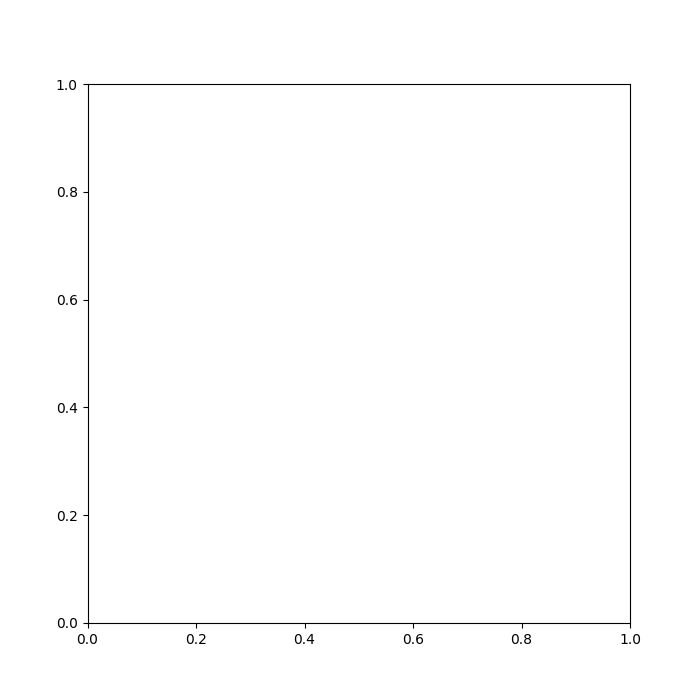

In [3]:
scale = 200
t1 = t[::scale]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

def init():
    ax.clear()
    ax.set_xlim(-40,40)
    ax.set_ylim(-40,40)
    
def Update(i):
    
    init()
    ax.set_title(r't %.3f' %(t1[i]))
  
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5)
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [4]:
a_momento = np.zeros(len(Particles[0].GetMomentum()))
momento_total = np.zeros((len(Particles[0].GetMomentum()),2))
for i in Particles:
    mom = i.GetMomentum()
    pos = i.GetPosition()
    momento_total = np.add(momento_total,mom)
    for i in range(len(mom)):
        a_momento[i]+= np.linalg.norm(np.cross(mom[i],pos[i]))
    

x_momento = momento_total.T[0]
y_momento = momento_total.T[1]

In [5]:
k_total = np.zeros(len(x_momento))
EP_total = np.zeros(len(x_momento))
for i in Particles:
    k_total = np.add(k_total,i.GetKineticEnergy())
    EP_total = np.add(EP_total,i.GetPotentialEnergy())
EP_total = EP_total/2

Text(0, 0.5, 'Momento (Kg m^2 s-2)')

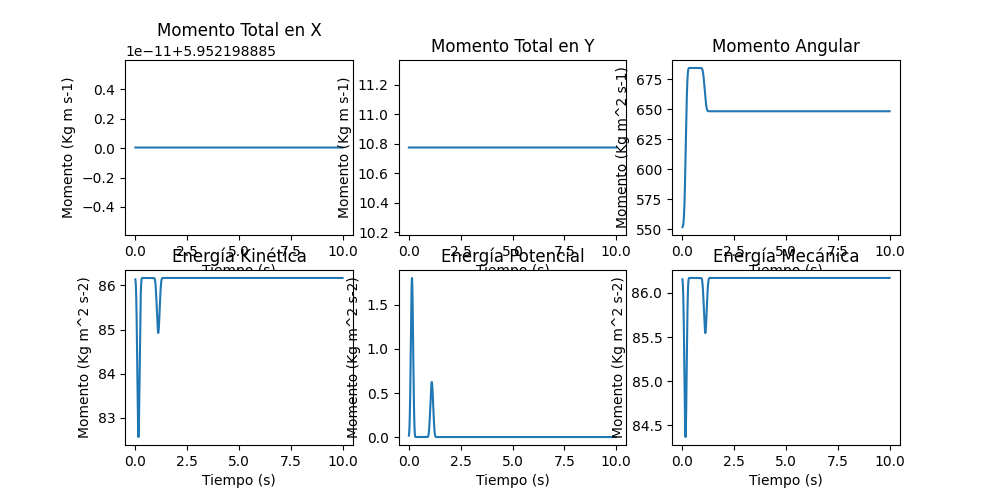

In [6]:
fig,ax2 = plt.subplots(2,3,figsize = (10,5))

ax2[0][0].plot(t,x_momento)
ax2[0][0].set_title("Momento Total en X")
ax2[0][0].set_xlabel("Tiempo (s)")
ax2[0][0].set_ylabel("Momento (Kg m s-1)")

ax2[0][1].plot(t,y_momento)
ax2[0][1].set_title("Momento Total en Y")
ax2[0][1].set_xlabel("Tiempo (s)")
ax2[0][1].set_ylabel("Momento (Kg m s-1)")

ax2[0][2].plot(t,a_momento)
ax2[0][2].set_title("Momento Angular")
ax2[0][2].set_xlabel("Tiempo (s)")
ax2[0][2].set_ylabel("Momento (Kg m^2 s-1)")

ax2[1][0].plot(t,k_total)
ax2[1][0].set_title("Energía Kinética")
ax2[1][0].set_xlabel("Tiempo (s)")
ax2[1][0].set_ylabel("Momento (Kg m^2 s-2)")

ax2[1][1].plot(t,EP_total)
ax2[1][1].set_title("Energía Potencial")
ax2[1][1].set_xlabel("Tiempo (s)")
ax2[1][1].set_ylabel("Momento (Kg m^2 s-2)")

ax2[1][2].plot(t,k_total+EP_total)
ax2[1][2].set_title("Energía Mecánica")
ax2[1][2].set_xlabel("Tiempo (s)")
ax2[1][2].set_ylabel("Momento (Kg m^2 s-2)")

Es importante mencionar que la escala de los momentos puede tener problemas. 

### a),b)

El momento en $x$ y $y$ se debe conservar ya que las partículas al chocar no pierden velocidad. En la grafica de cada momento se muestra esto, el momento antes de cada pico, que representan choques, es la misma que despues de él.

### c) 
Un campo vectorial F es conservativo si existe un campo escalar U tal que $\nabla U = F$. En el caso de la fuerza de este ejericicio, significa que la fuerza es integrable y su integración será el potencial buscado, es decir, la energía potencial. El cálculo para la energía potencial está anexado en la carpeta de tarea 1. Esta es la energía potencial:  $U = \frac{1}{4}kx^4$

### d) 
La energía cinetina se debe conservar ya que las pelotas antes y despues de cualquier choque no pierden velocidad ni tampoco masa como vimos con el momento.

### e)
Si el potencial es positivo, quiere decir que la fuerza era repulsiva y que por tanto, entre mayor sea la compreción y por tanto la fuerza en direccion contraria al choque, la energía potencial será mayor.

### f)
La energía mecánica se debe conservar en el modelo que asumimos, sin embargo, el método de Euler no es preciso y genera que en los choques se "calienten" las pelotas por lo que, la energía potencial no cubre la peridida de energía cinetica al desacelerar en el choque.

### g)
Para este sistema se cumple, ya que, la energía cinetica se conserva por lo que $\Delta K=0$. Esto concuerda con el trabajo efectuado por la fuerza de repulción, esta fuerza genera trabajo negativo desde el primer toque entre las pelotas hasta que tiene velocidad igual a 0, desde esde punto en adelante, la velocidad es contraria a la dirección de incidencia en una o las dos componentes, por lo que, se hará trabajo positivo hasta que dejen de estar comprimidas. Los trabajos son iguales, pero con signo contrario, por lo que el trabajo en un choque es igual a 0 como indica el teorema de trabajo y energía de este ejercicio.

### h)
El momento angular solo se conserva sin fuerzas externas actuando sobre el objeto, cuando chocan dos pelotas se genera una fuerza y por tanto, no se conserva. mientras que no haya choques se mantiene constante como se ve en la grafica
### i)
Ya que las condiciones iniciales solo tomamos en cuenta velocidades en $x$ y $y$, y se tiene posicion de todas las pelotas en $z=0$, los choques son tales que se mantendrían en el mismo plano, no tenderían a un desplazamiento en z. Sin embargo, si se toma una volocidad o posición en z, sí que podrían moverse en todo el volumen